In [103]:
import pandas as pd
import datetime as dt
import backtrader as bt
import quantstats as qs
import matplotlib as plt
import numpy as np
import os

filepath=os.getcwd()

In [104]:
#从聚宽获取沪深300日数据---------------------------------
# import jqdatasdk
# jqdatasdk.auth("15521441194", "LAQ@laq1017")
# jqdatasdk.get_query_count()
# data = jqdatasdk.get_price("000300.XSHG",start_date="2010-01-01",end_date="2022-05-22",frequency="1d")
# data.to_csv(filepath,'CSI300.csv',encoding='utf-8')


In [105]:
#计算技术指标ChaikinAD------------------------------------ 
df =pd.read_csv("CSI300.csv")
m=9
n=13
df['AD_m']=0
df['AD_n']=0
df['Chaikin']=0
#计算AD，从n之后开始有AD
for i in range(n,len(df)):
    AD_m=0
    AD_n=0
    for j in range(i-m+1,i+1):
        H=data['high'][i]
        L=data['low'][i]
        C=data['close'][i]
        V=data['volume'][i]
        AD_m+=(((C-L)-(H-C))/(H-L))*V
    for i in range(i-n+1,i+1):
        H=data['high'][i]
        L=data['low'][i]
        C=data['close'][i]
        V=data['volume'][i]   
        AD_n+=(((C-L)-(H-C))/(H-L))*V
    df['AD_m'][i]=AD_m
    df['AD_n'][i]=AD_n
    df['Chaikin'][i]=AD_m-AD_n
# df[:20]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
#生成信号函数-------------------------------------------------
#研报里面有AD、chakin两个策略，分别记为1，2
def signal(data,strategy):
    AD=data['AD_m']
    # AD=data['AD_n']
    Chaikin=data['Chaikin']
    data['signal']=0
    for i in range(14,len(data)):
        if strategy==1:
            if AD[i]>AD[i-1]:
                data['signal'][i]=1
            if AD[i]<AD[i-1]:
                data['signal'][i]=-1
        if strategy==2:
            if Chaikin[i-1]<0 and Chaikin[i]>0:
                data['signal'][i]=1
            if Chaikin[i-1]>0 and Chaikin[i]<0:
                data['signal'][i]=-1
    return data



In [ ]:
stock_df=signal(df,1)
stock_df.index=pd.to_datetime(stock_df.date)
stock_df['date']=pd.to_datetime(stock_df['date'])
stock_df

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,open,close,high,low,volume,money,AD_m,AD_n,Chaikin,signal
date,,,,,,,,,,,
2010-01-04,2010-01-04,3592.470,3535.23,3597.7500,3535.2300,6.610108e+09,9.341984e+10,0,0,0,0
2010-01-05,2010-01-05,3545.190,3564.04,3577.5300,3497.6600,8.580964e+09,1.283024e+11,0,0,0,0
2010-01-06,2010-01-06,3558.700,3541.73,3588.8300,3541.1700,7.847312e+09,1.210460e+11,0,0,0,0
2010-01-07,2010-01-07,3543.160,3471.46,3558.5600,3452.7700,8.035004e+09,1.204362e+11,0,0,0,0
2010-01-08,2010-01-08,3456.910,3480.13,3482.0800,3426.7000,6.079025e+09,9.019096e+10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,2022-05-06,3928.850,3908.82,3947.2400,3902.0500,1.230056e+10,2.148252e+11,-77535143178,-5254996366,-72280146811,-1
2022-05-09,2022-05-09,3883.950,3877.44,3914.1100,3854.9400,9.293669e+09,1.717565e+11,-20030786861,-10305162905,-9725623955,1
2022-05-10,2022-05-10,3820.630,3919.87,3932.6800,3808.5700,1.364169e+10,2.390602e+11,97430763261,-8795878385,106226641647,1


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


start portfolio value: 100000.0
2010-01-25,买单执行,3340.01
2010-01-26,卖单执行,3328.110000
毛收益 -345.10, 扣佣后收益 -383.78 , 佣金 38.68
2010-01-27,买单执行,3243.04
2010-02-01,卖单执行,3198.230000
毛收益 -1299.49, 扣佣后收益 -1336.85 , 佣金 37.36
2010-02-02,买单执行,3170.78
2010-02-03,卖单执行,3160.710000
毛收益 -302.10, 扣佣后收益 -340.09 , 佣金 37.99
2010-02-04,买单执行,3206.43
2010-02-05,卖单执行,3147.720000
毛收益 -1761.30, 扣佣后收益 -1799.42 , 佣金 38.12
2010-02-10,买单执行,3195.14
2010-02-12,卖单执行,3232.880000
毛收益 1132.20, 扣佣后收益  1093.63 , 佣金 38.57
2010-02-24,买单执行,3177.08
2010-03-01,卖单执行,3290.010000
毛收益 3387.90, 扣佣后收益  3349.10 , 佣金 38.80
2010-03-02,买单执行,3327.10
2010-03-03,卖单执行,3313.020000
毛收益 -422.40, 扣佣后收益 -462.24 , 佣金 39.84
2010-03-08,买单执行,3268.40
2010-03-11,卖单执行,3282.200000
毛收益 414.00, 扣佣后收益  374.70 , 佣金 39.30
2010-03-12,买单执行,3277.31
2010-03-15,卖单执行,3231.220000
毛收益 -1382.70, 扣佣后收益 -1421.75 , 佣金 39.05
2010-03-16,买单执行,3183.78
2010-03-19,卖单执行,3270.980000
毛收益 2616.00, 扣佣后收益  2577.27 , 佣金 38.73
2010-03-25,买单执行,3270.39
2010-03-26,卖单执行,3226.800000
毛收益 -130

                    Strategy
------------------  ----------
Start Period        2010-01-04
End Period          2022-05-12
Risk-Free Rate      0.0%
Time in Market      77.0%

Cumulative Return   -79.05%
CAGR﹪              -11.88%

Sharpe              -0.79
Prob. Sharpe Ratio  0.34%
Sortino             -1.07
Sortino/√2          -0.76
Omega               0.83

Max Drawdown        -81.09%
Longest DD Days     4209

Gain/Pain Ratio     -0.17
Gain/Pain (1M)      -0.49

Payoff Ratio        1.05
Profit Factor       0.83
Common Sense Ratio  0.79
CPC Index           0.39
Tail Ratio          0.94
Outlier Win Ratio   6.93
Outlier Loss Ratio  4.41

MTD                 1.45%
3M                  -6.91%
6M                  -12.33%
YTD                 -11.41%
1Y                  -14.95%
3Y (ann.)           -8.9%
5Y (ann.)           -10.02%
10Y (ann.)          -10.59%
All-time (ann.)     -11.88%

Avg. Drawdown       -16.61%
Avg. Drawdown Days  748
Recovery Factor     -0.97
Ulcer Index         0.58
Sereni

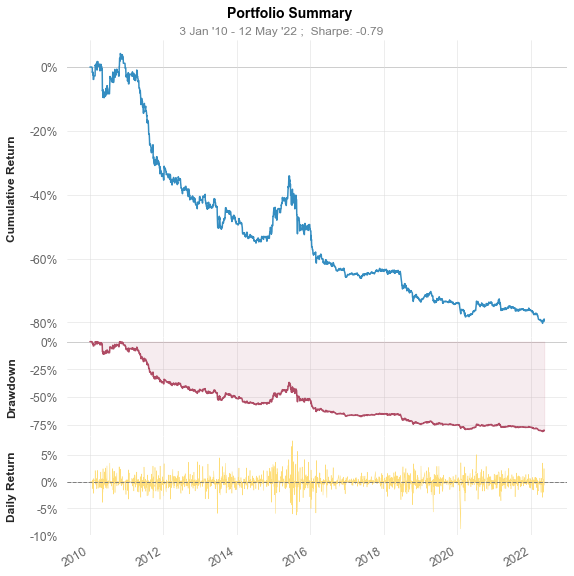

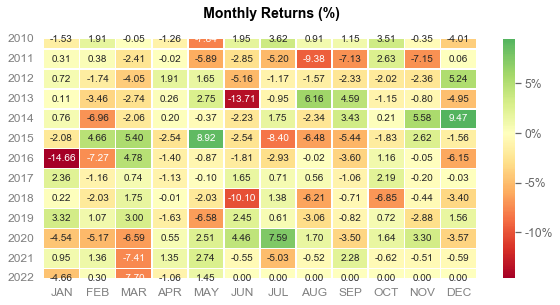

In [ ]:
#策略回测可视化-----------------------------------------------
#AD策略
stock_df=signal(df,1)
stock_df.index=pd.to_datetime(stock_df.date)

#构建策略-------------------------------------
class TestSignalStrategy(bt.Strategy):
    params=()

    def log(self,txt,dt=None):
        dt= dt or self.datetime.date(0)
        print('%s,%s' % (dt.isoformat(),txt)) 

    def __init__(self):
        self.bar_num=0
        self.signal_df=stock_df
        self.signal_df['date']=pd.to_datetime(self.signal_df['date'])
        self.first_trade=True

    def prenext(self):
        self.next()

    def next(self):
        self.bar_num+=1
        current_date=self.datas[0].datetime.date(0).strftime("%Y-%m-%d")
        try:
            next_date =self.datas[0].datetime.date(1)
        except:
            next_date=None
        if next_date != None:
            current_signal_df= self.signal_df[self.signal_df['date']==pd.to_datetime(self.datas[0].datetime.date(0))]
            next_signal_df= self.signal_df[self.signal_df['date']==pd.to_datetime(next_date)]
            if len(next_signal_df)==0:
                self.log("下个交易日的信号不存在")
            else:
                signal = int(current_signal_df['signal'])
                
                #第一次交易没有底仓，只允许做多
                #交易信号的执行方式：
                #先不考虑卖空
                #signal为1，以当天开盘价全仓买入
                #signal为-1时，以当天开盘价卖出所有持仓
                if self.first_trade:
                    if signal == -1:
                        pass
                    if signal == 1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        target_size=total_value//open_price
                        self.buy(self.datas[0],size=target_size,price=open_price)
                        self.first_trade=False
                else:
                    #现有持仓
                    now_hold_size = self.getposition(self.datas[0]).size
                    if signal == 1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        target_size=total_value//open_price
                        self.buy(self.datas[0],size=target_size, price=open_price)

                    if signal == -1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        # target_size=total_value//open_price
                        # #卖出开仓，手数不能超过底仓
                        # if target_size>now_hold_size:
                        #     target_size=now_hold_size
                        self.sell(self.datas[0],size=now_hold_size, price=open_price)

    #订单情况
    def notify_order(self, order):
        
        #订单处于未决，继续
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        #订单已决
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('买单执行,价格:%.2f,数量:%.2f' % (order.executed.price,order.executed.size))

            elif order.issell():
                self.log('卖单执行,价格:%.2f,数量:%.2f' % (order.executed.price,order.executed.size))
        
        elif order.status in [order.Canceled,order.Rejected,order.Expired]:
            self.log('订单 Canceled/Rejected/Expired')

    #交易情况
    def notify_trade(self, trade):
        if trade.isclosed:
            print('毛收益 %0.2f, 扣佣后收益 % 0.2f , 佣金 %.2f'
            % (trade.pnl, trade.pnlcomm, trade.commission))
        


cerebro=bt.Cerebro()

data=bt.feeds.PandasData(dataname=stock_df,timeframe=bt.TimeFrame.Days)

cerebro.adddata(data)

#滑点设置 0.5%
cerebro.broker = bt.brokers.BackBroker(slip_perc=0.005)
#初始资金设置为10万
cerebro.broker.setcash(100000.0)
#手续费万分之二
cerebro.broker.setcommission(commission=0.0002)

cerebro.addstrategy(TestSignalStrategy)
cerebro.addanalyzer(bt.analyzers.PyFolio,_name='PyFolio')

#运行回测
print('start portfolio value:',format(cerebro.broker.getvalue()))
results = cerebro.run()
print('end portfolio value:',format(cerebro.broker.getvalue()))

#绩效评价----------------------------
#获取策略实例
start = results[0]
portfolio_stats = start.analyzers.getbyname('PyFolio')
#以下returns为以日期为索引的资产日收益率序列
returns,positions,transactions,gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)
qs.reports.basic(returns,rf=0.0,grayscale=False,display=True,compounded = True)

start portfolio value: 100000.0
end portfolio value: 100000.0


                    Strategy
------------------  ----------
Start Period        2010-01-04
End Period          2022-05-12
Risk-Free Rate      0.0%
Time in Market      0.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              -
Prob. Sharpe Ratio  -
Sortino             -
Sortino/√2          -
Omega               -

Max Drawdown        %
Longest DD Days     -

Gain/Pain Ratio     -
Gain/Pain (1M)      -

Payoff Ratio        -
Profit Factor       -
Common Sense Ratio  -
CPC Index           -
Tail Ratio          -
Outlier Win Ratio   -
Outlier Loss Ratio  -

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Recovery Factor     -
Ulcer Index         0.0
Serenity Index      -
Avg. Drawdown Days  -


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1984: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


ZeroDivisionError: float division by zero

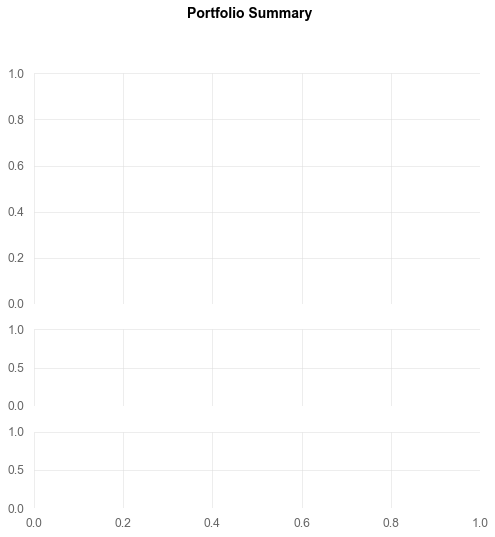

In [107]:
#Chakin策略

stock_df=signal(df,2)
stock_df.index=pd.to_datetime(stock_df.date)

#构建策略-------------------------------------
class TestSignalStrategy(bt.Strategy):
    params=()

    def log(self,txt,dt=None):
        dt= dt or self.datetime.date(0)
        print('%s,%s' % (dt.isoformat(),txt)) 

    def __init__(self):
        self.bar_num=0
        self.signal_df=stock_df
        self.signal_df['date']=pd.to_datetime(self.signal_df['date'])
        self.first_trade=True

    def prenext(self):
        self.next()

    def next(self):
        self.bar_num+=1
        current_date=self.datas[0].datetime.date(0).strftime("%Y-%m-%d")
        try:
            next_date =self.datas[0].datetime.date(1)
        except:
            next_date=None
        if next_date != None:
            current_signal_df= self.signal_df[self.signal_df['date']==pd.to_datetime(self.datas[0].datetime.date(0))]
            next_signal_df= self.signal_df[self.signal_df['date']==pd.to_datetime(next_date)]
            if len(next_signal_df)==0:
                self.log("下个交易日的信号不存在")
            else:
                signal = int(current_signal_df['signal'])
                
                #第一次交易没有底仓，只允许做多
                #交易信号的执行方式：
                #先不考虑卖空
                #signal为1，以当天开盘价全仓买入
                #signal为-1时，以当天开盘价卖出所有持仓
                if self.first_trade:
                    if signal == -1:
                        pass
                    if signal == 1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        target_size=total_value//open_price
                        self.buy(self.datas[0],size=target_size,price=open_price)
                        self.first_trade=False
                else:
                    #现有持仓
                    now_hold_size = self.getposition(self.datas[0]).size
                    if signal == 1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        target_size=total_value//open_price
                        self.buy(self.datas[0],size=target_size, price=open_price)

                    if signal == -1:
                        total_value = self.broker.get_value()
                        open_price = self.datas[0].open[0]
                        # target_size=total_value//open_price
                        # #卖出开仓，手数不能超过底仓
                        # if target_size>now_hold_size:
                        #     target_size=now_hold_size
                        self.sell(self.datas[0],size=now_hold_size, price=open_price)

    #订单情况
    def notify_order(self, order):
        
        #订单处于未决，继续
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        #订单已决
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('买单执行,价格:%.2f,数量:%.2f' % (order.executed.price,order.executed.size))

            elif order.issell():
                self.log('卖单执行,价格:%.2f,数量:%.2f' % (order.executed.price,order.executed.size))
        
        elif order.status in [order.Canceled,order.Rejected,order.Expired]:
            self.log('订单 Canceled/Rejected/Expired')

    #交易情况
    def notify_trade(self, trade):
        if trade.isclosed:
            print('毛收益 %0.2f, 扣佣后收益 % 0.2f , 佣金 %.2f'
            % (trade.pnl, trade.pnlcomm, trade.commission))
        


cerebro=bt.Cerebro()

data=bt.feeds.PandasData(dataname=stock_df,timeframe=bt.TimeFrame.Days)

cerebro.adddata(data)

#滑点设置 0.5%
cerebro.broker = bt.brokers.BackBroker(slip_perc=0.005)
#初始资金设置为10万
cerebro.broker.setcash(100000.0)
#手续费万分之二
cerebro.broker.setcommission(commission=0.0002)

cerebro.addstrategy(TestSignalStrategy)
cerebro.addanalyzer(bt.analyzers.PyFolio,_name='PyFolio')

#运行回测
print('start portfolio value:',format(cerebro.broker.getvalue()))
results = cerebro.run()
print('end portfolio value:',format(cerebro.broker.getvalue()))

#绩效评价----------------------------
#获取策略实例
start = results[0]
portfolio_stats = start.analyzers.getbyname('PyFolio')
#以下returns为以日期为索引的资产日收益率序列
returns,positions,transactions,gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)
qs.reports.basic(returns,rf=0.0,grayscale=False,display=True,compounded = True)